# DATAWIZ TASK 1- VISUALIZING PRACTICE DATASET

### 1.Defining the problem statment 
Completing the analysis of what sorts of people were likely to score more.

### 2. Collecting the data
#### loading practice set using Pandas


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #seaborn set as default for plotting
import scipy
from scipy import stats

#For some Statistics
from scipy.stats import norm, skew
#from sklearn.preprocessing import imputer
from sklearn.impute import SimpleImputer


In [2]:
import pandas as pd
df=pd.read_csv('Practice.csv') #loading dataset



### 3. Exploratory Data Analysis
Printing first 5 rows of the dataset.

In [3]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Finding shape of the dataset. ( Number of rows and column)

In [4]:
df.shape

(1000, 8)

Finding additional info about the data set.

In [5]:
df.describe() #to check skewness of data , mean is almost equal to median hence data is normally distributed

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


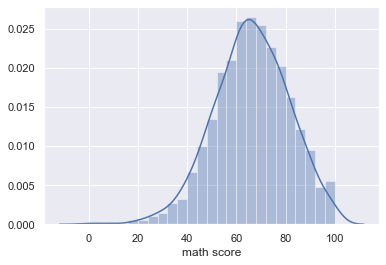

<Figure size 432x288 with 0 Axes>

In [6]:
sns.distplot(df['math score']);
fig = plt.figure()
#math score appears to have negative skew

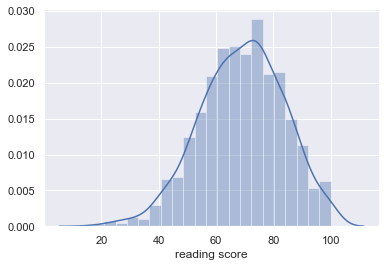

<Figure size 432x288 with 0 Axes>

In [7]:
sns.distplot(df['reading score']);
fig = plt.figure()
#reading score appears to have a very slight negative skew

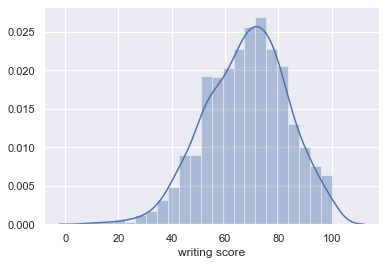

<Figure size 432x288 with 0 Axes>

In [8]:
sns.distplot(df['writing score']);
fig = plt.figure()
#writing score appears to have a slight negative skew

#### Checking for and handling missing data

In [9]:
df.info() #checking for missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Checking frequency of various data

In [11]:
counts=df['parental level of education'].value_counts()
counts

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

Text(0, 0.5, 'Number of people')

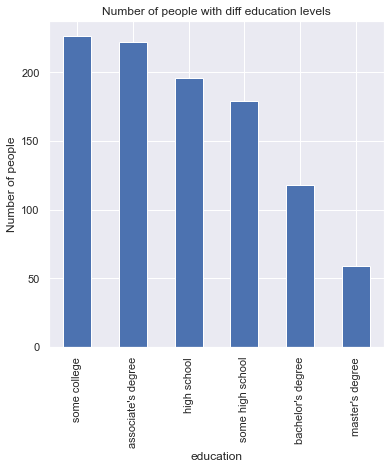

In [12]:
fig=plt.figure(figsize=(6,6)) #defining plot area
ax=fig.gca() #defining axis
counts.plot.bar(ax=ax) #using plot.bar method
ax.set_title('Number of people with diff education levels')
ax.set_xlabel("education")
ax.set_ylabel('Number of people')

In [13]:
counts2=df['gender'].value_counts()
counts2

female    518
male      482
Name: gender, dtype: int64

Text(0, 0.5, 'Number of people')

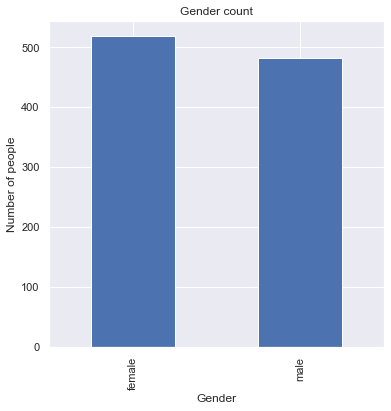

In [14]:
fig=plt.figure(figsize=(6,6)) #defining plot area
ax=fig.gca() #defining axis
counts2.plot.bar(ax=ax) #using plot.bar method
ax.set_title('Gender count')
ax.set_xlabel('Gender')
ax.set_ylabel('Number of people')

# An overall visual of Race and Gender Distribution

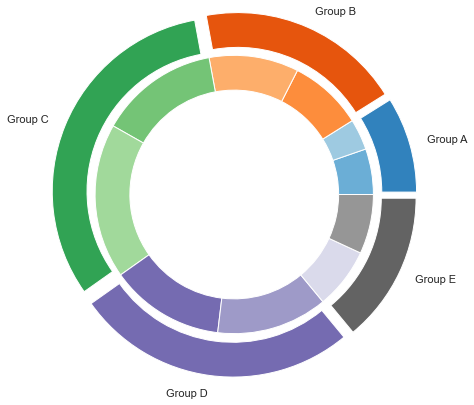

In [15]:
# plot a nested pie chart of all races with the amount of males and females in each race

# make a 'value count' list of gender column for each race

rA = df['gender'].loc[df['race/ethnicity'] == 'group A'].value_counts()
rB = df['gender'].loc[df['race/ethnicity'] == 'group B'].value_counts()
rC = df['gender'].loc[df['race/ethnicity'] == 'group C'].value_counts()
rD = df['gender'].loc[df['race/ethnicity'] == 'group D'].value_counts()
rE = df['gender'].loc[df['race/ethnicity'] == 'group E'].value_counts()

# making a list of the number of males and females in all races

genderData = np.array([[rA.male, rA.female], [rB.male, rB.female], [rC.male, rC.female], [rD.male, rD.female],
                       [rE.male, rE.female]])

# creating an ethnicity list
ethnicity = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E']

gen = ['Male']

fig, ax = plt.subplots()

size = 0.4

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(5)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10, 12, 13, 15, 17]))
explodeInner = [0.2, 0.2, 0.2, 0.2, 0.2]
explodeOuter = [0.1, 0.1, 0.1, 0.1, 0.1]

ax.pie(genderData.sum(axis=1), labels = ethnicity, explode = explodeOuter, radius=2, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(genderData.flatten(), radius=2-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal")
plt.show()

**In the inner pie chart, the lighter shade represents the male population while the darker shade the female**

# Data manipulation

**Converting categorical data into numbers**

In [16]:
#df['gender'].replace(["male","female"],[0,1],inplace=True)


In [17]:
#df['race/ethnicity'].replace(["group A","group B","group C","group D","group E"],[0,1,2,3,4],inplace=True)

**Combining 'high school' and 'some high school' as 'high school' under ' parent level of education' column.**

In [18]:
df['parental level of education'].replace(["some high school"],['high school'],inplace=True) 

**Adding a column for average scores of the three scores**

In [19]:
df['avg_score']=(df['math score']+df['reading score']+df['writing score'])/3

**Coverting scores into a range**

In [20]:
df['avg_score_range'] = pd.cut(x=df['avg_score'], bins=[0,35, 50, 60, 70,80,90,100],labels=['0-35','35-50','50-60','60-70','70-80','80-90','90-100'])
df['math_score_range'] = pd.cut(x=df['math score'], bins=[0,35, 50, 60, 70,80,90,100],labels=['0-35','35-50','50-60','60-70','70-80','80-90','90-100'])
df['reading_score_range'] = pd.cut(x=df['reading score'], bins=[0,35, 50, 60, 70,80,90,100],labels=['0-35','35-50','50-60','60-70','70-80','80-90','90-100'])
df['writing_score_range'] = pd.cut(x=df['writing score'], bins=[0,35, 50, 60, 70,80,90,100],labels=['0-35','35-50','50-60','60-70','70-80','80-90','90-100'])


**New dataset** 

In [21]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score,avg_score_range,math_score_range,reading_score_range,writing_score_range
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,70-80,70-80,70-80,70-80
1,female,group C,some college,standard,completed,69,90,88,82.333333,80-90,60-70,80-90,80-90
2,female,group B,master's degree,standard,none,90,95,93,92.666667,90-100,80-90,90-100,90-100
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,35-50,35-50,50-60,35-50
4,male,group C,some college,standard,none,76,78,75,76.333333,70-80,70-80,70-80,70-80


# Analyzing various features
## <font color= blue>1. Gender </font>

#### Comparing Gender with avg score

Text(0, 0.5, 'Average Total Scored')

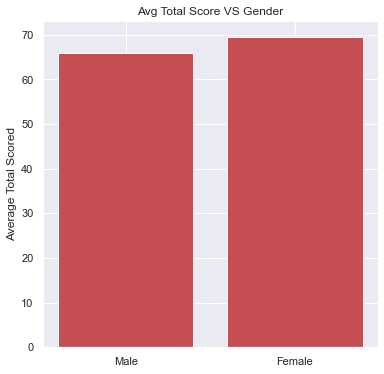

In [22]:
maleScore = df['avg_score'].loc[df['gender'] == 'male']
maleScore = maleScore.mean()
femaleScore = df['avg_score'].loc[df['gender'] == 'female']
femaleScore = femaleScore.mean()

# create lists to plot on x and y axes
gender = ['Male', 'Female']
genderScores = [maleScore, femaleScore]

plt.figure(figsize=(6, 6))
ax = plt.subplot()
plt.bar(gender , genderScores, align = 'center', color = 'r')
plt.title('Avg Total Score VS Gender')
plt.ylabel('Average Total Scored')


**Analysis using stacked bar chart** 

In [23]:
def avg_score_range_anal(feature):
    first = df[df['avg_score_range']=="0-35"][feature].value_counts()
    sec = df[df['avg_score_range']=="35-50"][feature].value_counts()
    third = df[df['avg_score_range']=="50-60"][feature].value_counts()
    fourth = df[df['avg_score_range']=="60-70"][feature].value_counts()
    fifth = df[df['avg_score_range']=="70-80"][feature].value_counts()
    sixth = df[df['avg_score_range']=="80-90"][feature].value_counts()
    seventh = df[df['avg_score_range']=="90-100"][feature].value_counts()
   
    df2 = pd.DataFrame([first,sec,third,fourth,fifth,sixth,seventh])
    df2.index = ['0-35','35-50','50-60','60-70','70-80','80-90','90-100']
    df2.plot(kind='bar',stacked=True, figsize=(10,5))

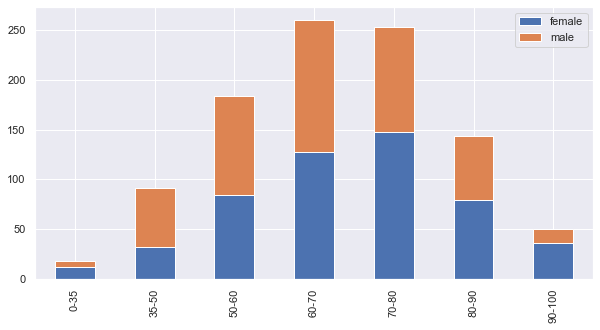

In [24]:
avg_score_range_anal('gender')

**<font color=red>Conlusion: More females have higher average scores than males.</font>**

### <font color=blue> 2. Race/Ethnicity </font>

**Checking correlation between Race and scores**

In [25]:
def race_analysis(feature):
    grA = df[df['race/ethnicity']=='group A'][feature].value_counts()
    grB = df[df['race/ethnicity']=='group B'][feature].value_counts()
    grc = df[df['race/ethnicity']=='group C'][feature].value_counts()
    grd = df[df['race/ethnicity']=='group D'][feature].value_counts()
    gre = df[df['race/ethnicity']=='group E'][feature].value_counts()
    df2 = pd.DataFrame([grA,grB,grc,grd,gre])
    df2.index = ['group a',' group b', 'group c','group d','group e']
    df2.plot(kind='bar',stacked=True, figsize=(10,5))

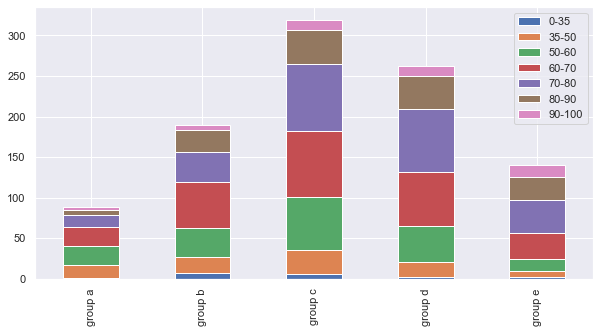

In [26]:
race_analysis('avg_score_range')

**<font color=red> Group A did not get high average score </font>**

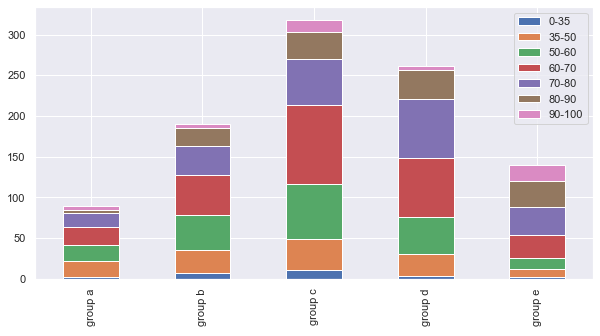

In [27]:
race_analysis('math_score_range')

**<font color=red> Group C and Group E have high math scores. </font>**

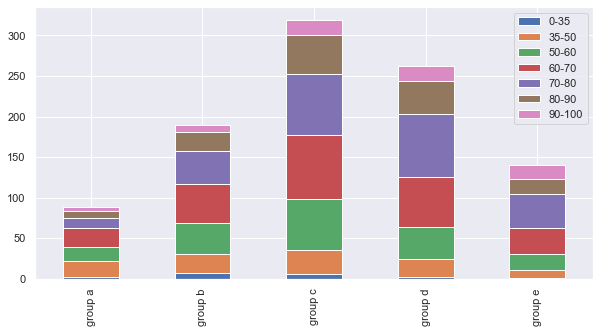

In [28]:
race_analysis('writing_score_range')

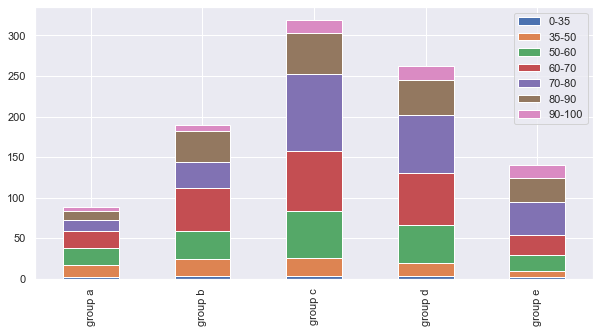

In [29]:
race_analysis('reading_score_range')

In [30]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score,avg_score_range,math_score_range,reading_score_range,writing_score_range
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,70-80,70-80,70-80,70-80
1,female,group C,some college,standard,completed,69,90,88,82.333333,80-90,60-70,80-90,80-90
2,female,group B,master's degree,standard,none,90,95,93,92.666667,90-100,80-90,90-100,90-100
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,35-50,35-50,50-60,35-50
4,male,group C,some college,standard,none,76,78,75,76.333333,70-80,70-80,70-80,70-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,90-100,80-90,90-100,90-100
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,50-60,60-70,50-60,50-60
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,60-70,50-60,70-80,60-70
998,female,group D,some college,standard,completed,68,78,77,74.333333,70-80,60-70,70-80,70-80


In [31]:
# add a new column 'total' with the total score for all entries
# this will be used later to plot gender vs score and race vs score graphs

# make a list of columns to add
columnList = ['math score', 'reading score', 'writing score']

# make new column 'total' and fill it with sum of entries wrt the fields in the above list
df['total'] = df[columnList].sum(axis = 1) # axis = 1 adds values horizontaly

Text(0, 0.5, 'Avg Total Score')

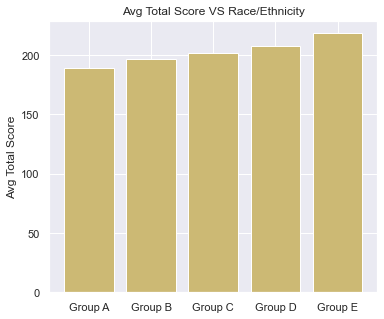

In [32]:
# plot a graph of Avg Total Score VS Race/Ethnicity

# create a separate list for each race having their respective total scores

gA = df.loc[df['race/ethnicity'] == 'group A']
gB = df.loc[df['race/ethnicity'] == 'group B']
gC = df.loc[df['race/ethnicity'] == 'group C']
gD = df.loc[df['race/ethnicity'] == 'group D']
gE = df.loc[df['race/ethnicity'] == 'group E']

# make a list of mean values of total marks scored by all races
groupMeanScore = [gA['total'].mean(), gB['total'].mean(), gC['total'].mean(), gD['total'].mean(), gE['total'].mean()]

# set figure size
plt.figure(figsize=(20, 5))
plt.subplot(131)

# creating an ethnicity list
ethnicity = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E']

# plot bar
plt.bar(ethnicity, groupMeanScore, color = 'y')

# add title and y-axis label to graph
plt.title('Avg Total Score VS Race/Ethnicity')
plt.ylabel('Avg Total Score')

### <font color=blue> 3. Parental Level Of Education </font>

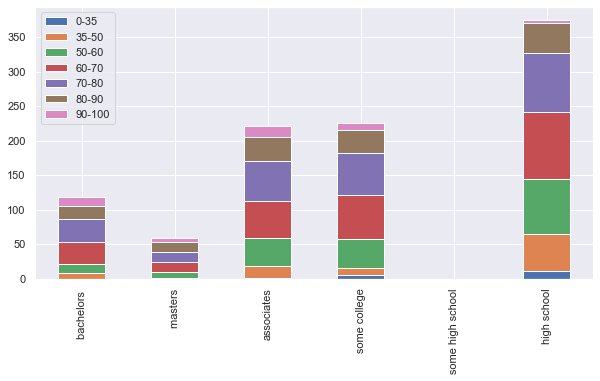

In [33]:
def edu_level_analysis(feature):
    groupA = df[df['parental level of education']=="bachelor's degree"][feature].value_counts()
    grB = df[df['parental level of education']=="master's degree"][feature].value_counts()
    grc = df[df['parental level of education']=="associate's degree"][feature].value_counts()
    grd = df[df['parental level of education']=='some college'][feature].value_counts()
    gre = df[df['parental level of education']=='some high school'][feature].value_counts()
    grf = df[df['parental level of education']=='high school'][feature].value_counts()

    df3 = pd.DataFrame([groupA,grB,grc,grd,gre,grf])
    df3.index = ['bachelors ',' masters', 'associates','some college','some high school','high school']
    df3.plot(kind='bar',stacked=True, figsize=(10,5))
edu_level_analysis('avg_score_range')   

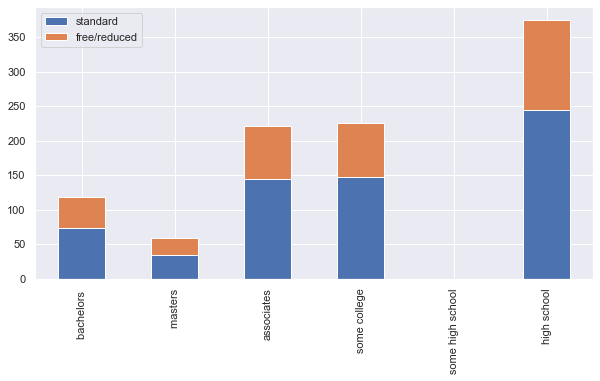

In [34]:
edu_level_analysis('lunch')

### <font color=blue> 4. Test preparation course </font>

In [35]:
df['test preparation course'].replace("completed", 1)
df['test preparation course'].replace("none", 0)

0              0
1      completed
2              0
3              0
4              0
         ...    
995    completed
996            0
997    completed
998    completed
999            0
Name: test preparation course, Length: 1000, dtype: object

In [36]:
# replace the original column with the modified column
test=df['test preparation course'] 

**plot density graph to see how taking the course affects the majorities math score**

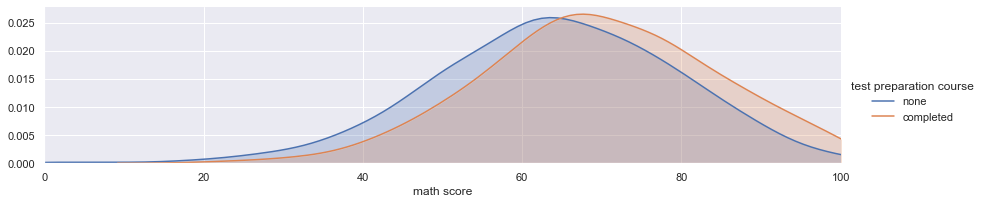

In [37]:
facet = sns.FacetGrid(df, hue="test preparation course",aspect=4)
facet.map(sns.kdeplot,'math score',shade= True)
facet.set(xlim=(0, df['math score'].max()))
facet.add_legend()
 
plt.show()

**<font color=red> Conclusion: Taking the Preparatory course does not seem to have a significant effect on students math scores.</font>**

**plot density graph to see how taking the course affects the majorities reading score**

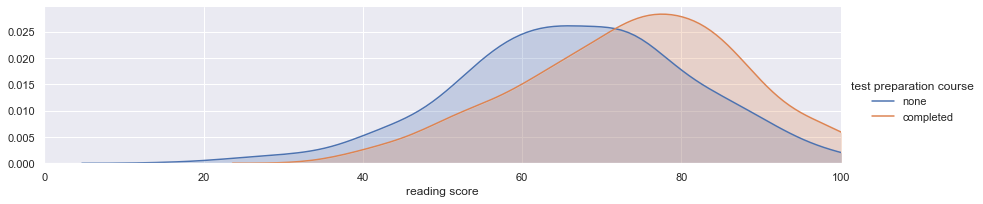

In [38]:
facet = sns.FacetGrid(df, hue="test preparation course",aspect=4)
facet.map(sns.kdeplot,'reading score',shade= True)
facet.set(xlim=(0, df['reading score'].max()))
facet.add_legend()
 
plt.show()

**<font color=red> Conclusion: Taking the Preparatory course has a significant effect on students reading scores.</font>**

**# plot density graph to see how taking the course affects the majorities writing score**

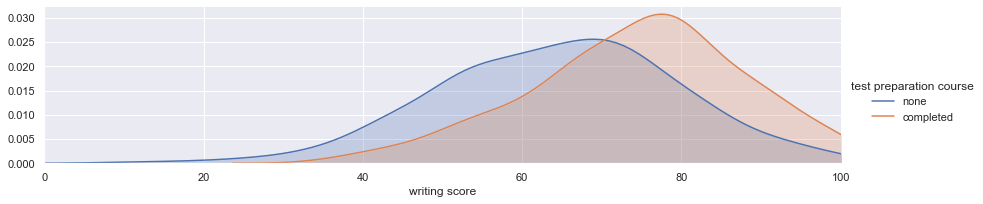

In [39]:


facet = sns.FacetGrid(df, hue="test preparation course",aspect=4)
facet.map(sns.kdeplot,'writing score',shade= True)
facet.set(xlim=(0, df['writing score'].max()))
facet.add_legend()
 
plt.show()

**<font color=red>Conclusion: Taking the Preparatory course has a significant effect on students writing scores.</font>**

**plot density graph to see how taking the course affects the majorities writing score**

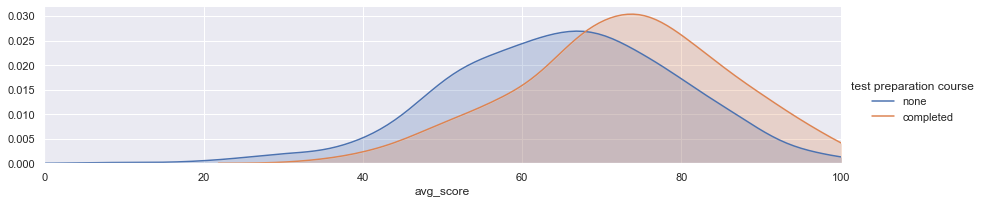

In [40]:
facet = sns.FacetGrid(df, hue="test preparation course",aspect=4)
facet.map(sns.kdeplot,'avg_score',shade= True)
facet.set(xlim=(0, df['avg_score'].max()))
facet.add_legend()
 
plt.show()

**<font color=red> Conclusion: Taking the course shows an increase in average scores. </font>**

### <font color=blue> 5. Lunch </font>

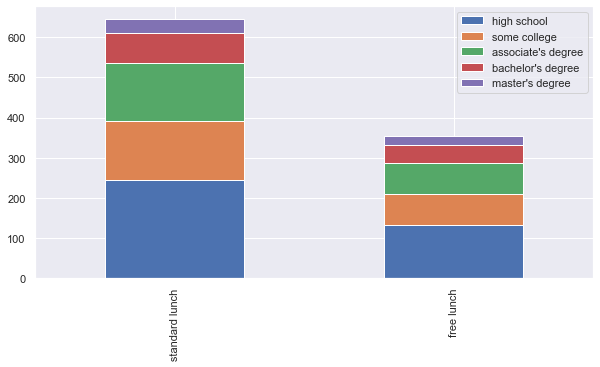

In [41]:
def lunch_analysis(feature): # defining func to find lunch relation with other parameters
    standard_lunch = df[df['lunch']=="standard"][feature].value_counts()
    free_lunch = df[df['lunch']=="free/reduced"][feature].value_counts()


    df4 = pd.DataFrame([standard_lunch,free_lunch])
    df4.index = ['standard lunch','free lunch']
    df4.plot(kind='bar',stacked=True, figsize=(10,5))
lunch_analysis('parental level of education')   # finding relationship bw parents education lvl and lunch type of students  
    

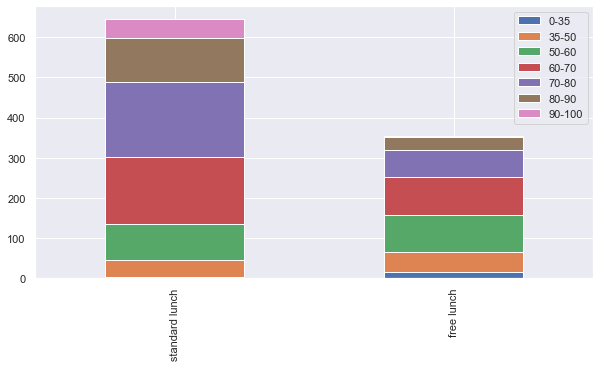

In [42]:
lunch_analysis('avg_score_range')

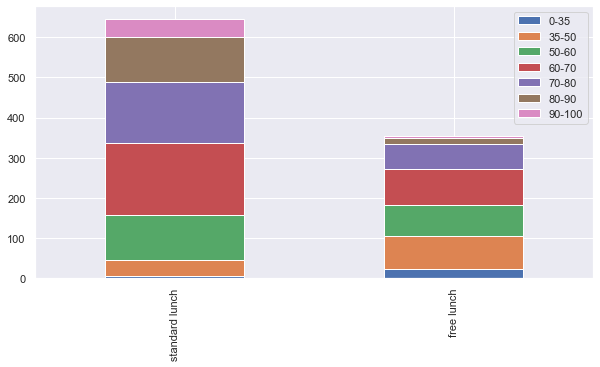

In [43]:
lunch_analysis('math_score_range')

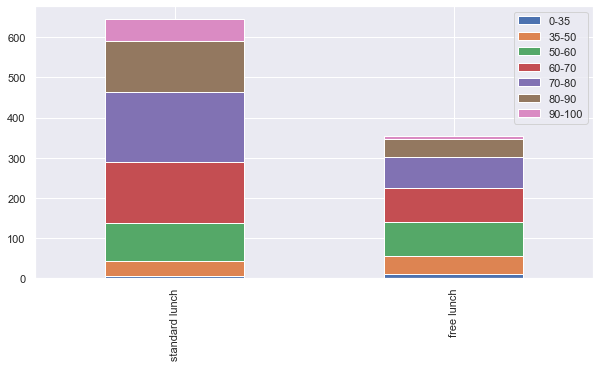

In [44]:
lunch_analysis('reading_score_range')

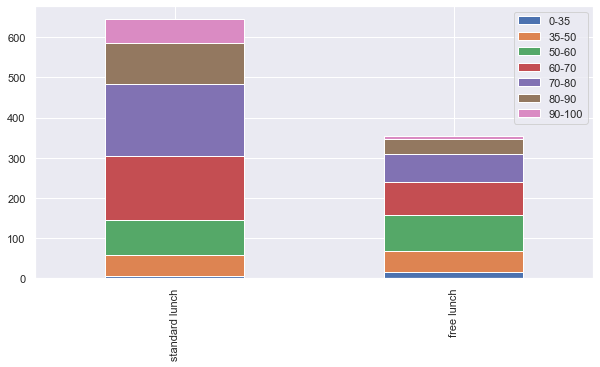

In [45]:
lunch_analysis('writing_score_range')

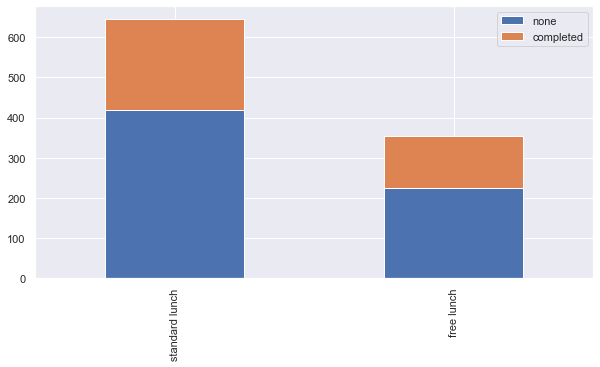

In [46]:
lunch_analysis('test preparation course') 


# Relation between scores

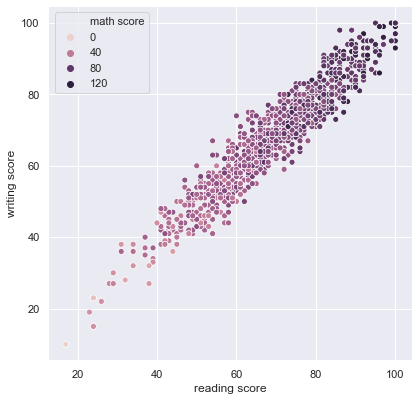

In [47]:
# scatter plot to see relation between scores of all three skills

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x = 'reading score', y = 'writing score', hue = 'math score', sizes=(1, 8), data = df)

**<font color=red>Conclusion: Writing and Reading Scores have more correlation with each other than with Math Score</font>**

# Overall Conclusions
* Taking the test preparation course showed an increase in test scores on an average.
* Students with 'standard' lunch performed better than those with 'free' lunch. (probably due to better food habits and a balanced diet)
* Female students performed better than male students.
* Students who scored high were children of parents with college degrees.
* High reading scores usually meant high writing scores and vice-versa.


# References
*  https://seaborn.pydata.org/introduction.html
* https://www.youtube.com/watch?v=Upcs6OCgnow
* https://towardsdatascience.com/a-step-by-step-guide-for-creating-advanced-python-data-visualizations-with-seaborn-matplotlib-1579d6a1a7d0